# **AIN 212 - Project - FALL 2024**

**Student 1 Number** : 2230765051

**Name Surname**   : Gülse Atun

**Student 2 Number** : 2220765059

**Name Surname**   : Dinara Aliyeva

# **Necessary Imports**

In [30]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    roc_auc_score
)


# **PART 1: Data Collection**

### **faoset Path:** "./FAO.csv"
We will deal with the "Food and Agriculture Organization" faoset. The faoset of the United Nations provides free access to food and agriculture fao for over 245 countries and territories, from the year 1961 to the most recent update. This faoset provides an insight on our worldwide food production - focusing on a comparison between food produced for human consumption and feed produced for animals.


### **Features:**
* Area Abbreviation: Country name abbreviation (categorical)
* Area Code: Country code
* Area: Country name (categorical)
* Item Code: Food item code
* Item: Food item (categorical)
* Element Code: Food or Feed code 
* Element: Food or Feed (categorical)
* Unit: Unit of measurement
* latitude: Latitude (numerical)
* longitude: Longitude (numerical)
* Y1961-Y2013: Production years (numerical)

### **Questions**

Global Trends:

* How has global food production changed over the years?
* What are the top-producing countries for key food commodities (e.g., wheat, rice, corn)?

In [31]:
fao = pd.read_csv("./FAO.csv", encoding='latin1')
fao_copy = fao.copy()
print(fao.columns)
print(fao.head())

Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')
  Area Abbreviation  Area Code         Area  Item Code  \
0               AFG          2  Afghanistan       2511   
1               AFG          2  Afghanistan       2805   
2               AFG          2  Afghanistan       2513   
3               AFG          2  Afghanistan       2513   
4               AFG     

# **PART 2: Preprocessing and Cleaning**

Based on the data science question that you want to explore, preprocess the data according to the principles that we have discussed in class. You may need to do cleaning, if the data has significant amount of noise. Also, you may need to preprocess the textual data to create your own variables. Describe in detail all the data preprocessing steps that you have done. Analyze your data and report your observations.

In [32]:

# Detecting null values
print(fao.isnull().sum())
# Select columns with yearly fao for imputation
year_columns = [col for col in fao.columns if col.startswith('Y')]
# Create "Region_type" column to adress the data science question 
region_mean_production = fao.groupby('Area')[year_columns].mean().mean(axis=1)
threshold = region_mean_production.median()
fao['Region_Type'] = fao['Area'].map(
    lambda x: 'High-Producing' if region_mean_production[x] > threshold else 'Low-Producing'
)

fao['Yearly_Mean'] = fao[year_columns].mean(axis=1, skipna=True)

# Apply interpolation within each 'Area' and 'Item' group
for col in year_columns:
    fao[col] = fao[col].fillna(fao['Yearly_Mean'])


non_year_columns = [col for col in fao.columns if col not in year_columns]

# Function to detect and replace outliers in a row (year columns only)
def outliers(row, threshold=3):
    # Calculate Z-scores for the row (ignoring NaNs)
    z_scores = zscore(row, nan_policy='omit')
    
    # Identify outlier indices
    outlier_indices = abs(z_scores) > threshold
    
    # Replace outliers with the mean of non-outlier values in the row
    row[outlier_indices] = row[~outlier_indices].mean(skipna=True)
    
    return row

# Apply the function only to the year columns
fao[year_columns] = fao[year_columns].apply(
    lambda row: outliers(row), axis=1
)

Area Abbreviation      0
Area Code              0
Area                   0
Item Code              0
Item                   0
                    ... 
Y2009                104
Y2010                104
Y2011                104
Y2012                  0
Y2013                  0
Length: 63, dtype: int64


# **PART 3: Data Exploration and Analysis**

In this step, you should explore data, present some of the critical statistics about the data that has been collected and preprocessed. At this step, you should also carry out clustering analysis on the data as well. The results of data analysis step must be presented via visualization and the results of clustering should be discussed in detail.

### **3.1. Understanding the Data**
 - Summarize the dataset:
    - Shape (number of rows and columns)
    - Data types of each column
    - Sample records (e.g., the first 5–10 rows)

In [33]:
# 3.1.1 Shape of the dataset
shape = fao.shape
print(shape)
"""The dataset contains 21,477 rows and 64 columns."""


# 3.1.2 Data types of each column
data_types = fao.dtypes
print(data_types)
"""The data contains these data types: int64, object, float64"""


# 3.1.3 Sample records
sample_records = fao.head(10)
print(sample_records)

(21477, 65)
Area Abbreviation     object
Area Code              int64
Area                  object
Item Code              int64
Item                  object
                      ...   
Y2011                float64
Y2012                float64
Y2013                float64
Region_Type           object
Yearly_Mean          float64
Length: 65, dtype: object
  Area Abbreviation  Area Code         Area  Item Code  \
0               AFG          2  Afghanistan       2511   
1               AFG          2  Afghanistan       2805   
2               AFG          2  Afghanistan       2513   
3               AFG          2  Afghanistan       2513   
4               AFG          2  Afghanistan       2514   
5               AFG          2  Afghanistan       2514   
6               AFG          2  Afghanistan       2517   
7               AFG          2  Afghanistan       2520   
8               AFG          2  Afghanistan       2531   
9               AFG          2  Afghanistan       2536   

    

### **3.2. Descriptive Statistics**
 - Key metrics such as:
    - Mean, median, and standard deviation for numerical columns
    - Frequency counts for categorical columns

In [34]:
# 2.1 Key metrics for numerical columns: Mean, Median, Standard Deviation
numerical_stats = fao[year_columns].agg(['mean', 'median', 'std'])
print("Numerical Descriptive Statistics:\n")
print(numerical_stats)

# 2.2 Frequency counts for categorical columns
categorical_cols = fao.select_dtypes(include=['object']).columns
catgorical_frequency = {col: fao[col].value_counts() for col in categorical_cols}

# Display frequency counts for categorical columns
print("\n\nCategorical Frequency Counts:\n")
for col, freq in catgorical_frequency.items():
    print(f"\nColumn: {col}")
    print(freq)

Numerical Descriptive Statistics:

              Y1961        Y1962        Y1963        Y1964        Y1965  \
mean     205.379137   209.292256   213.344357   217.224424   223.541795   
median     1.904762     2.000000     2.000000     2.000000     2.000000   
std     1791.238598  1805.553058  1785.708149  1786.501387  1920.113946   

              Y1966        Y1967        Y1968        Y1969        Y1970  ...  \
mean     230.672513   234.403728   241.053037   246.098366   251.044258  ...   
median     2.000000     2.000000     2.000000     2.000000     2.000000  ...   
std     1995.041060  2023.223907  2073.305209  2142.056750  2191.594487  ...   

              Y2004        Y2005        Y2006        Y2007        Y2008  \
mean     481.562148   487.792515   495.101430   507.332091   520.933928   
median     6.000000     6.000000     7.000000     7.000000     7.000000   
std     4961.836827  5059.298070  5122.409591  5286.541521  5483.599822   

              Y2009        Y2010        Y2

### **Numerical Data Analysis**

Yearly Metrics:

Mean:
Average production values steadily increase from 1966 (230.67) to 2013 (558.74), indicating overall growth in production over time.

Median:
The median values remain consistently low (2 to 7) across all years, suggesting a high skew in the data with many regions having minimal production and a few regions contributing disproportionately.

Standard Deviation:
The standard deviation values are significantly large, starting at 1995.04 in 1966 and increasing to 6206.91 in 2013. This highlights substantial variability in production levels across regions and items.

Trends Over Time:

There is a clear upward trend in average production over the years, coupled with increasing variability. This suggests that while production has generally risen, disparities between high- and low-producing regions have also widened.

### **Categorical Data Analysis**

Area Abbreviation: The dataset covers 169 unique regions, with CHN (China) appearing most frequently (541 entries). This reflects China's prominence in global production data.

Area: A total of 174 unique country/region names are included, with Spain (150 entries) and Italy (148 entries) among the most frequently listed.

Item: 115 unique items are covered, with Milk - Excluding Butter having the highest frequency (558 entries). Other significant items include Eggs, Cereals - Excluding Beer, and Fish, Seafood.

Element: The dataset includes two main elements: Food (17,528 entries) and Feed (3,949 entries). Food dominates, reflecting the dataset's focus on consumable production.

Unit: All measurements are reported in 1000 tonnes, ensuring consistency across the dataset.

Region_Type: Regions are categorized as High-Producing (11,270 entries) and Low-Producing (10,207 entries), indicating a fairly balanced distribution between high and low output regions.


Growth and Variability: The steady increase in mean production values over time is encouraging, but the growing standard deviation underscores widening gaps in production levels among regions.

Highly Skewed Data: Low median values compared to the mean suggest the presence of extreme outliers or a small number of regions/items contributing disproportionately to production.

Categorical Insights: The dominance of specific items (Milk, Eggs) and regions (China, Spain) highlights areas of focus in global production.
Balanced Regional Representation:

The near-equal representation of High-Producing and Low-Producing regions provides a good foundation for comparative analysis.


### **3.3 Handling Missing Data**
   - Analyze missing data patterns:
      - Percentage of missing values per column
      - Visualizations like heatmaps or bar plots to show missingness

       Missing Percentage
Y1961           16.478093
Y1962           16.478093
Y1963           16.478093
Y1964           16.478093
Y1965           16.478093
Y1966           16.478093
Y1967           16.478093
Y1968           16.478093
Y1969           16.478093
Y1970           16.478093
Y1971           16.478093
Y1972           16.478093
Y1973           16.478093
Y1974           16.478093
Y1975           16.478093
Y1976           16.478093
Y1977           16.478093
Y1978           16.478093
Y1979           16.478093
Y1980           16.478093
Y1981           16.478093
Y1982           16.478093
Y1983           16.478093
Y1984           16.478093
Y1985           16.478093
Y1986           16.478093
Y1987           16.478093
Y1988           16.478093
Y1989           16.478093
Y1990           15.900731
Y1991           15.900731
Y1992            4.595614
Y1993            2.849560
Y1994            2.849560
Y1995            2.849560
Y1996            2.849560
Y1997            2.849560
Y1998       

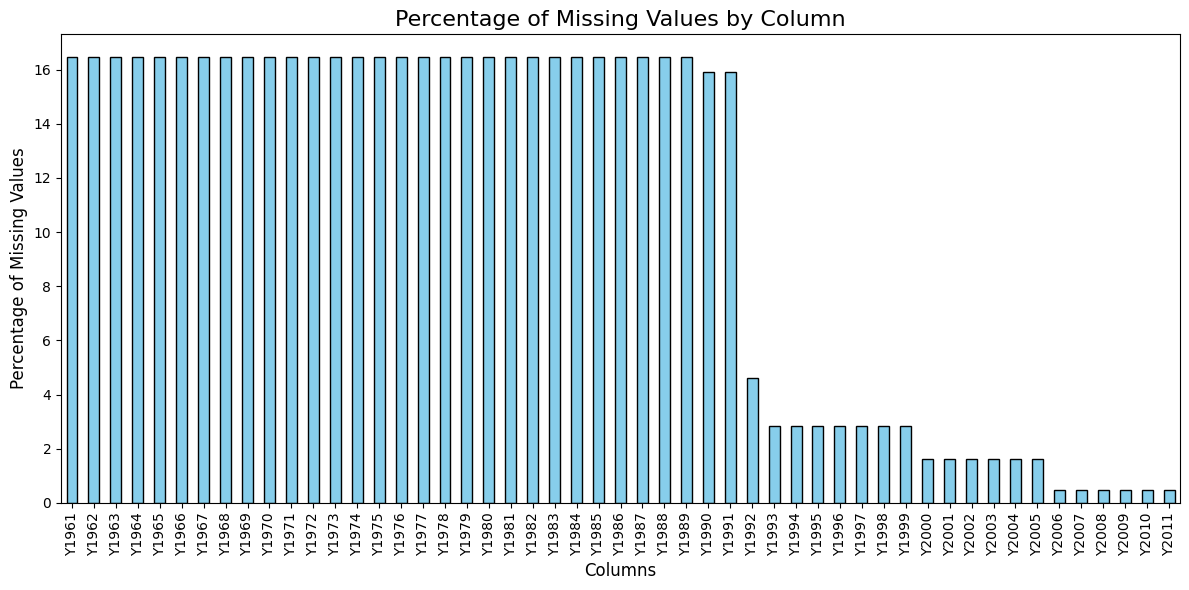

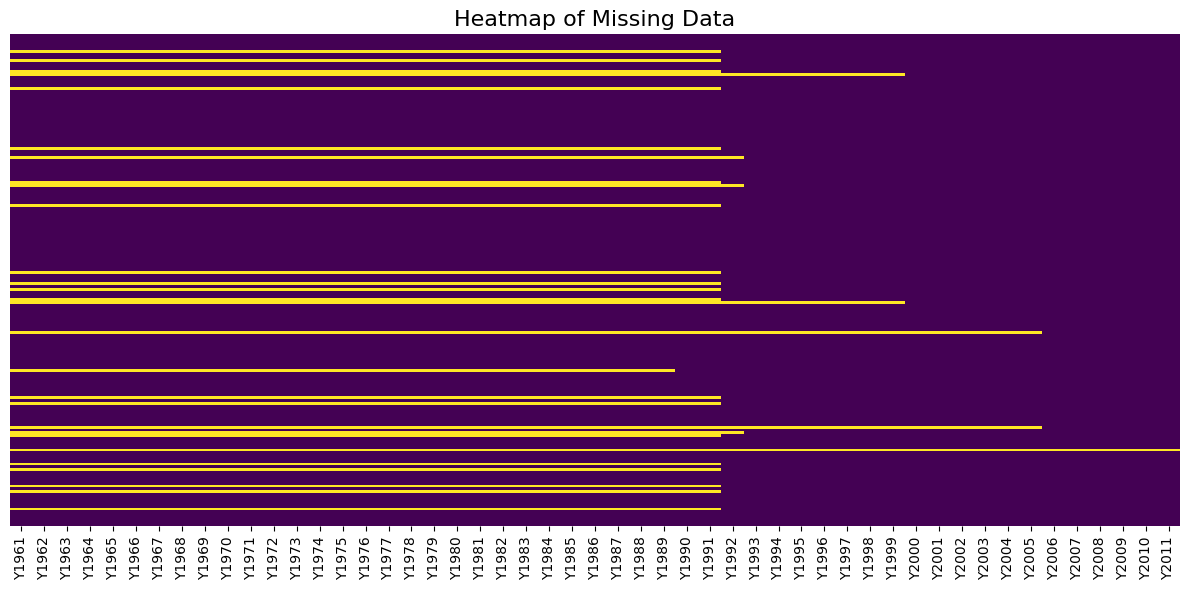

In [35]:


# 3.3.1 Calculate the percentage of missing values per column
missing_percentage = fao_copy.isnull().mean() * 100

# Identify columns with missing values
missing_columns = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Display results
missing_columns_results = missing_columns.to_frame(name='Missing Percentage')
print(missing_columns_results)


# 3.3.2 Visualizations
# Bar Plot
plt.figure(figsize=(12, 6))
missing_columns.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Percentage of Missing Values', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Heatmap
plt.figure(figsize=(12, 6))
cols_with_missing = fao_copy.columns[fao_copy.isnull().any()]
sns.heatmap(fao_copy[cols_with_missing].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Data', fontsize=16)
plt.tight_layout()
plt.show()


#### **Percentage of Missing Values:**

Yearly columns like Y1961, Y1962, ..., Y1989 have the highest percentage of missing values (16.48%).
Recent years (e.g., Y2006 to Y2011) have significantly fewer missing values (0.48%).

#### **Patterns:**

Older years have higher missing data, possibly due to incomplete historical records.
Missing data decreases as years approach the present, indicating improved data availability or collection practices.


### **3.4. Outlier Detection**
 - Use box plots or histograms to identify outliers.
 - Statistical methods:
    - Z-score analysis
    - Interquartile range (IQR)

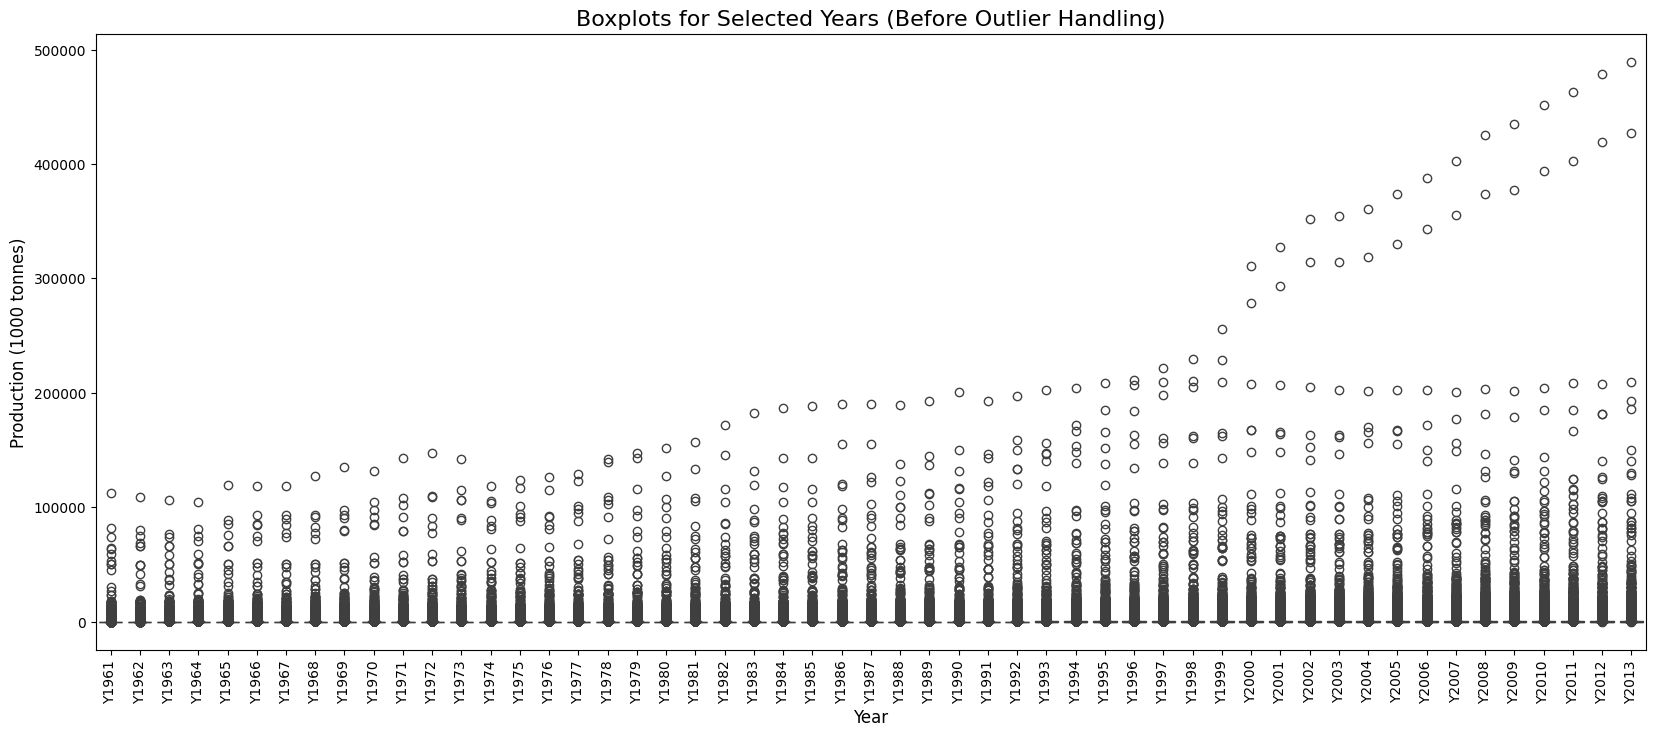

Z-Score Based Outliers in Y1961: 112
Percentage of Outliers: 0.52%
IQR-Based Outliers in Y1961: 3698

Z-Score Based Outliers in Y1962: 112
Percentage of Outliers: 0.52%
IQR-Based Outliers in Y1962: 3714

Z-Score Based Outliers in Y1963: 117
Percentage of Outliers: 0.54%
IQR-Based Outliers in Y1963: 3706

Z-Score Based Outliers in Y1964: 120
Percentage of Outliers: 0.56%
IQR-Based Outliers in Y1964: 3709

Z-Score Based Outliers in Y1965: 113
Percentage of Outliers: 0.53%
IQR-Based Outliers in Y1965: 3697

Z-Score Based Outliers in Y1966: 110
Percentage of Outliers: 0.51%
IQR-Based Outliers in Y1966: 3713

Z-Score Based Outliers in Y1967: 111
Percentage of Outliers: 0.52%
IQR-Based Outliers in Y1967: 3689

Z-Score Based Outliers in Y1968: 108
Percentage of Outliers: 0.50%
IQR-Based Outliers in Y1968: 3691

Z-Score Based Outliers in Y1969: 106
Percentage of Outliers: 0.49%
IQR-Based Outliers in Y1969: 3699

Z-Score Based Outliers in Y1970: 106
Percentage of Outliers: 0.49%
IQR-Based Outli

In [36]:
# Using a copy of the df because the data is processed in earlier steps

# Plot boxplots for  year columns

plt.figure(figsize=(20, 8))
sns.boxplot(data=fao_copy[year_columns])
plt.title("Boxplots for Selected Years (Before Outlier Handling)", fontsize=16)
plt.xlabel("Year", fontsize=12, )
plt.ylabel("Production (1000 tonnes)", fontsize=12)
plt.xticks(rotation=90) 
plt.show()


def outlier_z(year):
    # Calculate Z-scores for a specific year (e.g., Y2013)
    z_scores = zscore(fao_copy[f'{year}'], nan_policy='omit')

    # Identify outliers using the threshold
    outlier_threshold = 3
    outliers = (abs(z_scores) > outlier_threshold).sum()
    total_values = len(fao_copy[f'{year}'])

    print(f"Z-Score Based Outliers in {year}: {outliers}")
    print(f"Percentage of Outliers: {100 * outliers / total_values:.2f}%")




def outlier_IQ(year):
    # Calculate IQR for a specific year
    q1 = fao[f'{year}'].quantile(0.25)
    q3 = fao[f'{year}'].quantile(0.75)
    iqr = q3 - q1

    # Define lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers
    iqr_outliers = ((fao[f'{year}'] < lower_bound) | (fao[f'{year}'] > upper_bound)).sum()

    print(f"IQR-Based Outliers in {f'{year}'}: {iqr_outliers}\n")


for year in year_columns:
    outlier_z(year)
    outlier_IQ(year)


### **Analysis of Outlier Detection**
#### **1. Boxplot Insights**
The boxplot clearly shows:

- Presence of Outliers: Outliers are visible as points outside the whiskers for almost every year.
- Increasing Variability Over Time: The spread (interquartile range) grows significantly from 1961 to 2013, indicating increasing production variability.
- Extreme Values: Some years, especially towards the end of the timeline, show extreme outliers far removed from the bulk of the data. These could represent unique events or measurement errors.

#### **2. Statistical Outlier Summary**

Outlier statistics using both Z-score and IQR methods reveal key patterns:

Z-Score Analysis:

- Outliers identified using Z-scores are consistent across years, with a low percentage (0.44%–0.56%).
- This low percentage indicates that most data points are within the expected range, with only extreme values flagged as outliers.

IQR Analysis:

- The IQR method detects significantly more outliers than the Z-score approach. For 1961, 3,698 outliers were flagged compared to 112 with Z-scores.
- This difference suggests that IQR is more sensitive, potentially capturing a broader range of deviations.
- The high number of outliers using IQR likely reflects the skewed nature of production data, with a long tail of extreme values.

Trends Over Time:
- The number of outliers decreases slightly in later years (e.g., 89 outliers in 2010 via Z-scores compared to 112 in 1961).
- This suggests a stabilization or improvement in production data quality over time.

### **3.5. Relationships in Data**
 - Correlation matrix for numerical variables.
 - Pivot tables or cross-tabulations for categorical data.
 - Pairwise scatterplots to visualize relationships.

In [37]:
# Step 3.5: Relationships in Data

# 1. Correlation Matrix for Numerical Variables
numerical_cols = fao.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = fao[numerical_cols].corr()

# Display Correlation Matrix
print("Correlation Matrix for Numerical Variables:")
print(correlation_matrix)

# 2. Pivot Tables or Cross-Tabulations for Categorical Data
# Example: Cross-tabulation of `Area` and `Element`
categorical_pivot = pd.crosstab(fao['Area'], fao['Element'])

# Display Cross-Tabulation
print("\nCross-Tabulation (Area vs. Element):")
print(categorical_pivot)




Correlation Matrix for Numerical Variables:
              Area Code  Item Code  Element Code  latitude  longitude  \
Area Code      1.000000  -0.001314      0.007862  0.053814   0.077680   
Item Code     -0.001314   1.000000      0.012293 -0.003563   0.000103   
Element Code   0.007862   0.012293      1.000000  0.100812   0.006947   
latitude       0.053814  -0.003563      0.100812  1.000000   0.058966   
longitude      0.077680   0.000103      0.006947  0.058966   1.000000   
Y1961          0.017344   0.059537      0.024288  0.065361   0.019054   
Y1962          0.015254   0.060398      0.024947  0.065187   0.019682   
Y1963          0.015089   0.062337      0.026901  0.066805   0.020334   
Y1964          0.014841   0.063570      0.027406  0.067212   0.021056   
Y1965          0.013364   0.060246      0.026083  0.063962   0.020123   
Y1966          0.011086   0.059533      0.026787  0.062691   0.020509   
Y1967          0.011264   0.059709      0.026550  0.062546   0.020563   
Y1968  

### **Analysis of Matrices**
#### **1. Correlation Matrix for Numerical Variables**
- Latitude and longitude have weak correlations with production data, suggesting that other factors (e.g., technology, policies) play a more significant role.
- Yearly production columns exhibit strong correlations, indicating consistent growth patterns across time.
#### **2. Cross-Tabulation of Area vs. Element**
- The "Food" element significantly outweighs "Feed" in most regions, reflecting a focus on meeting human consumption needs.
- Variability between regions indicates differences in agricultural priorities (e.g., livestock farming vs. food crops).

### **3.6. Data Visualization**
 - Histograms, bar charts, or pie charts for distributions.
 - Line plots for trends.
 - Boxplots for distributions and outliers.

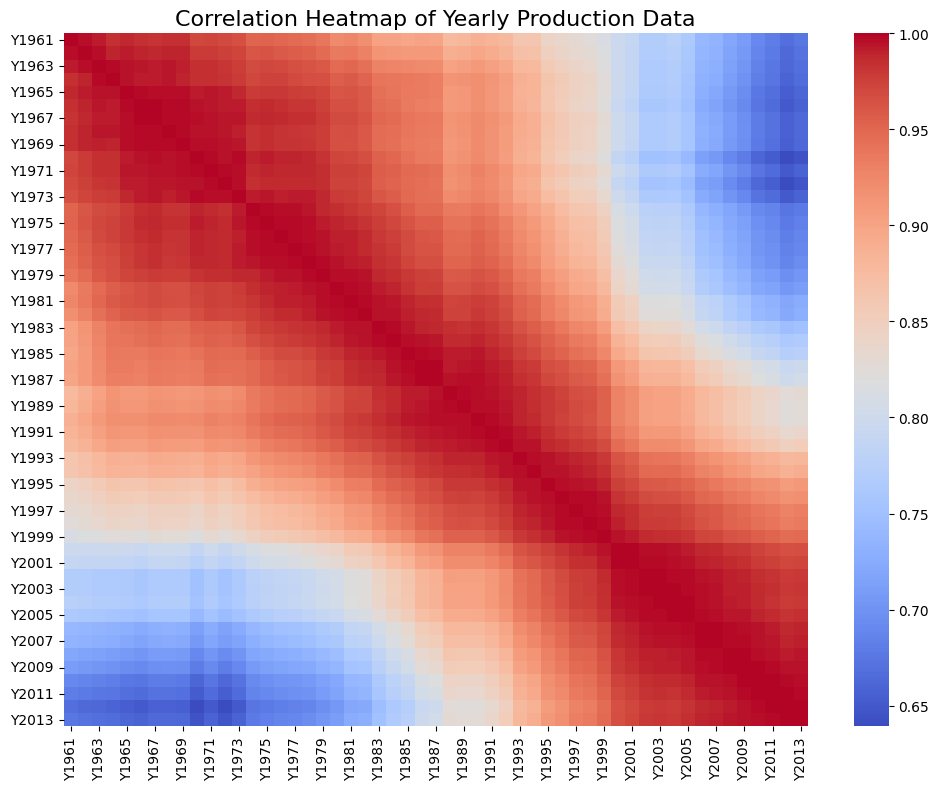

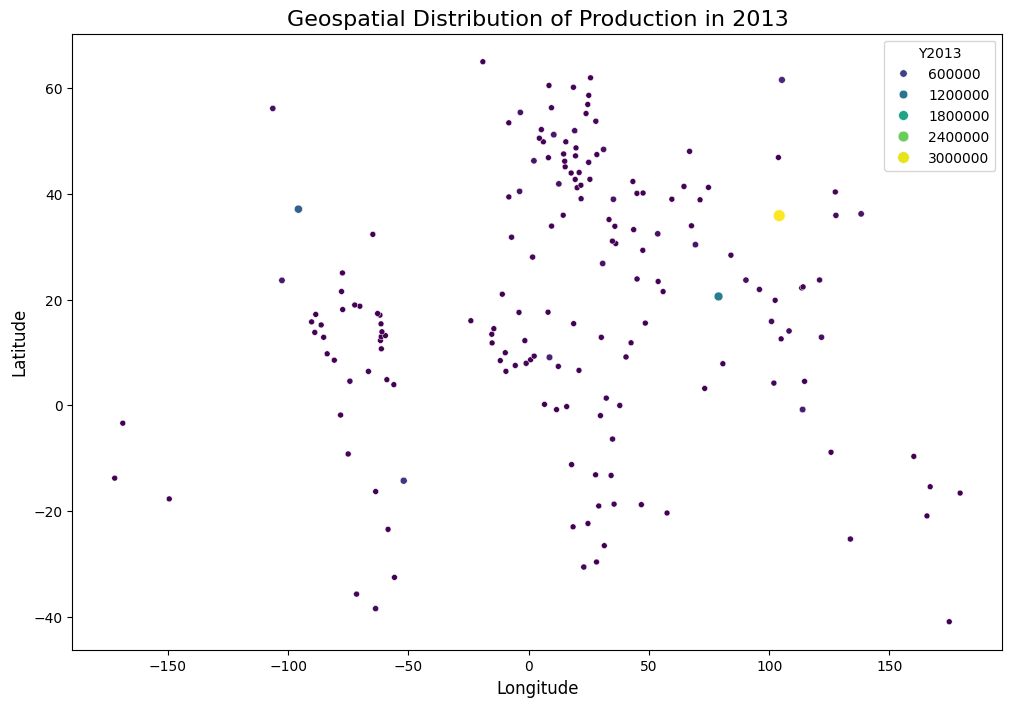

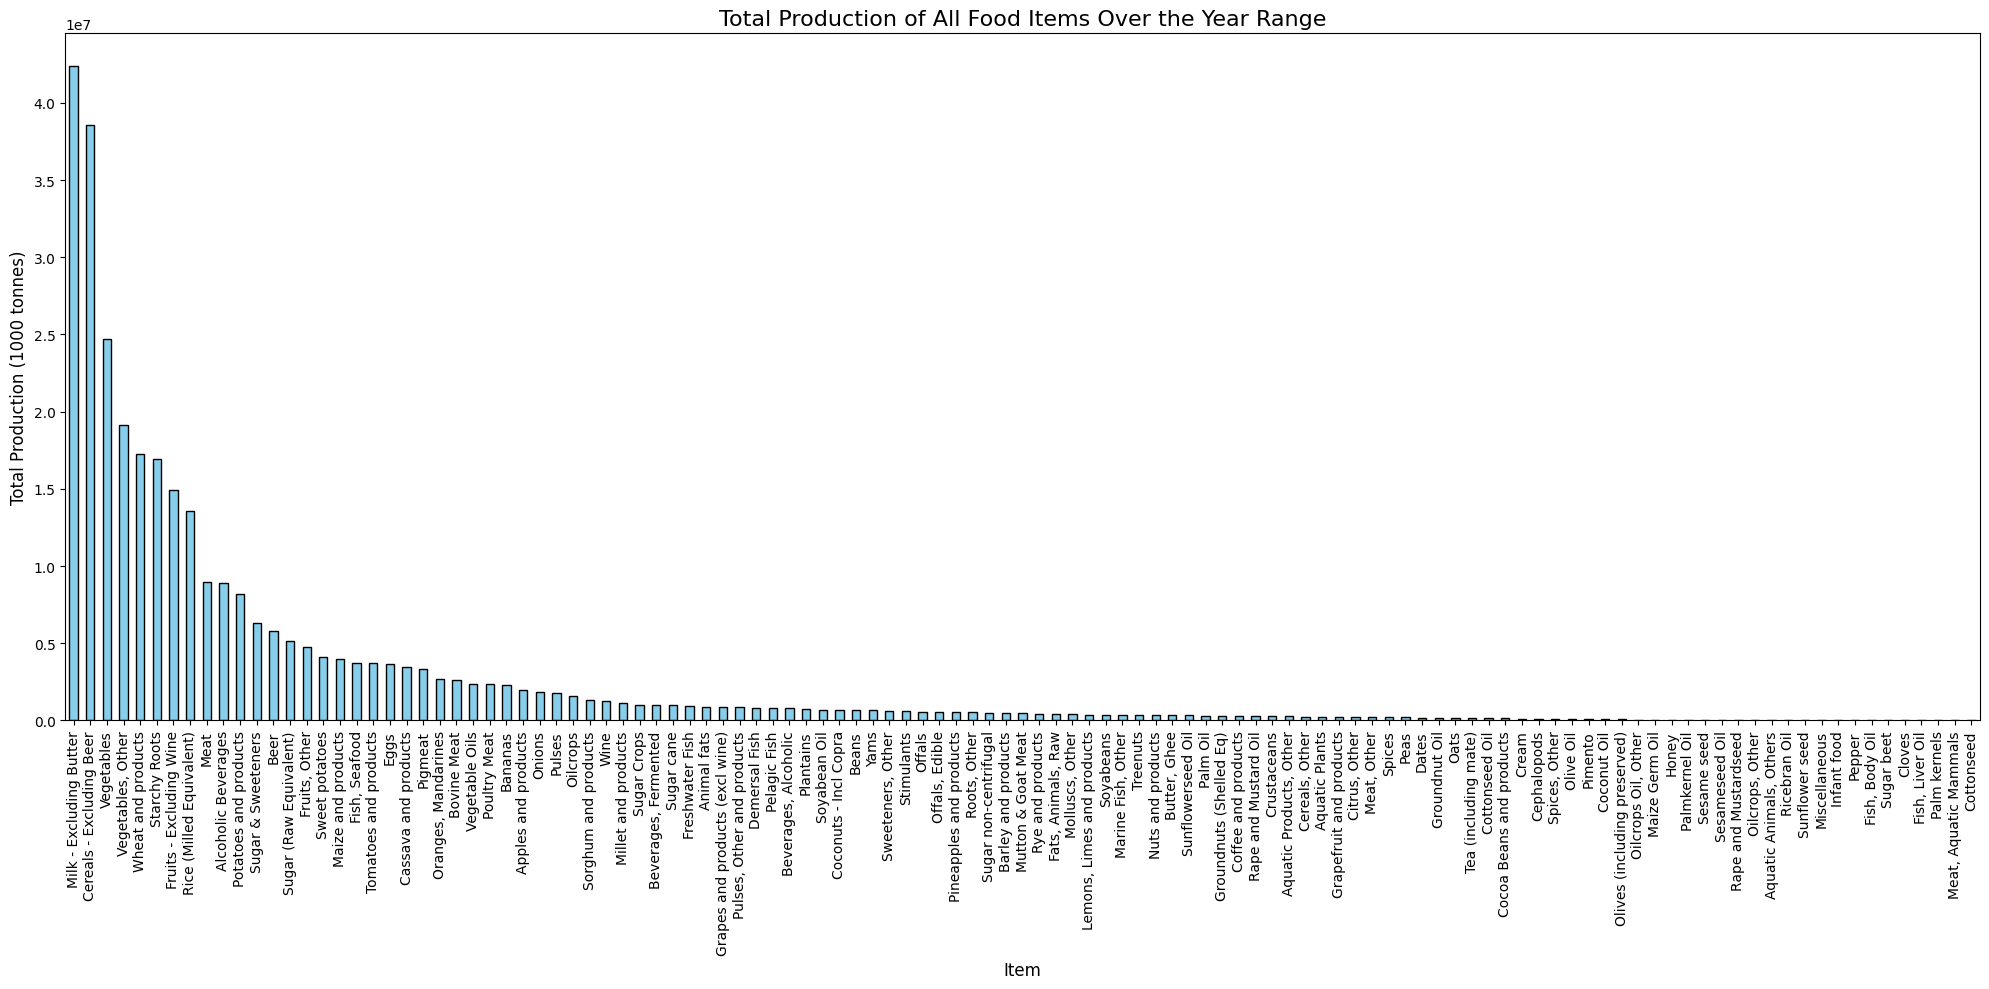

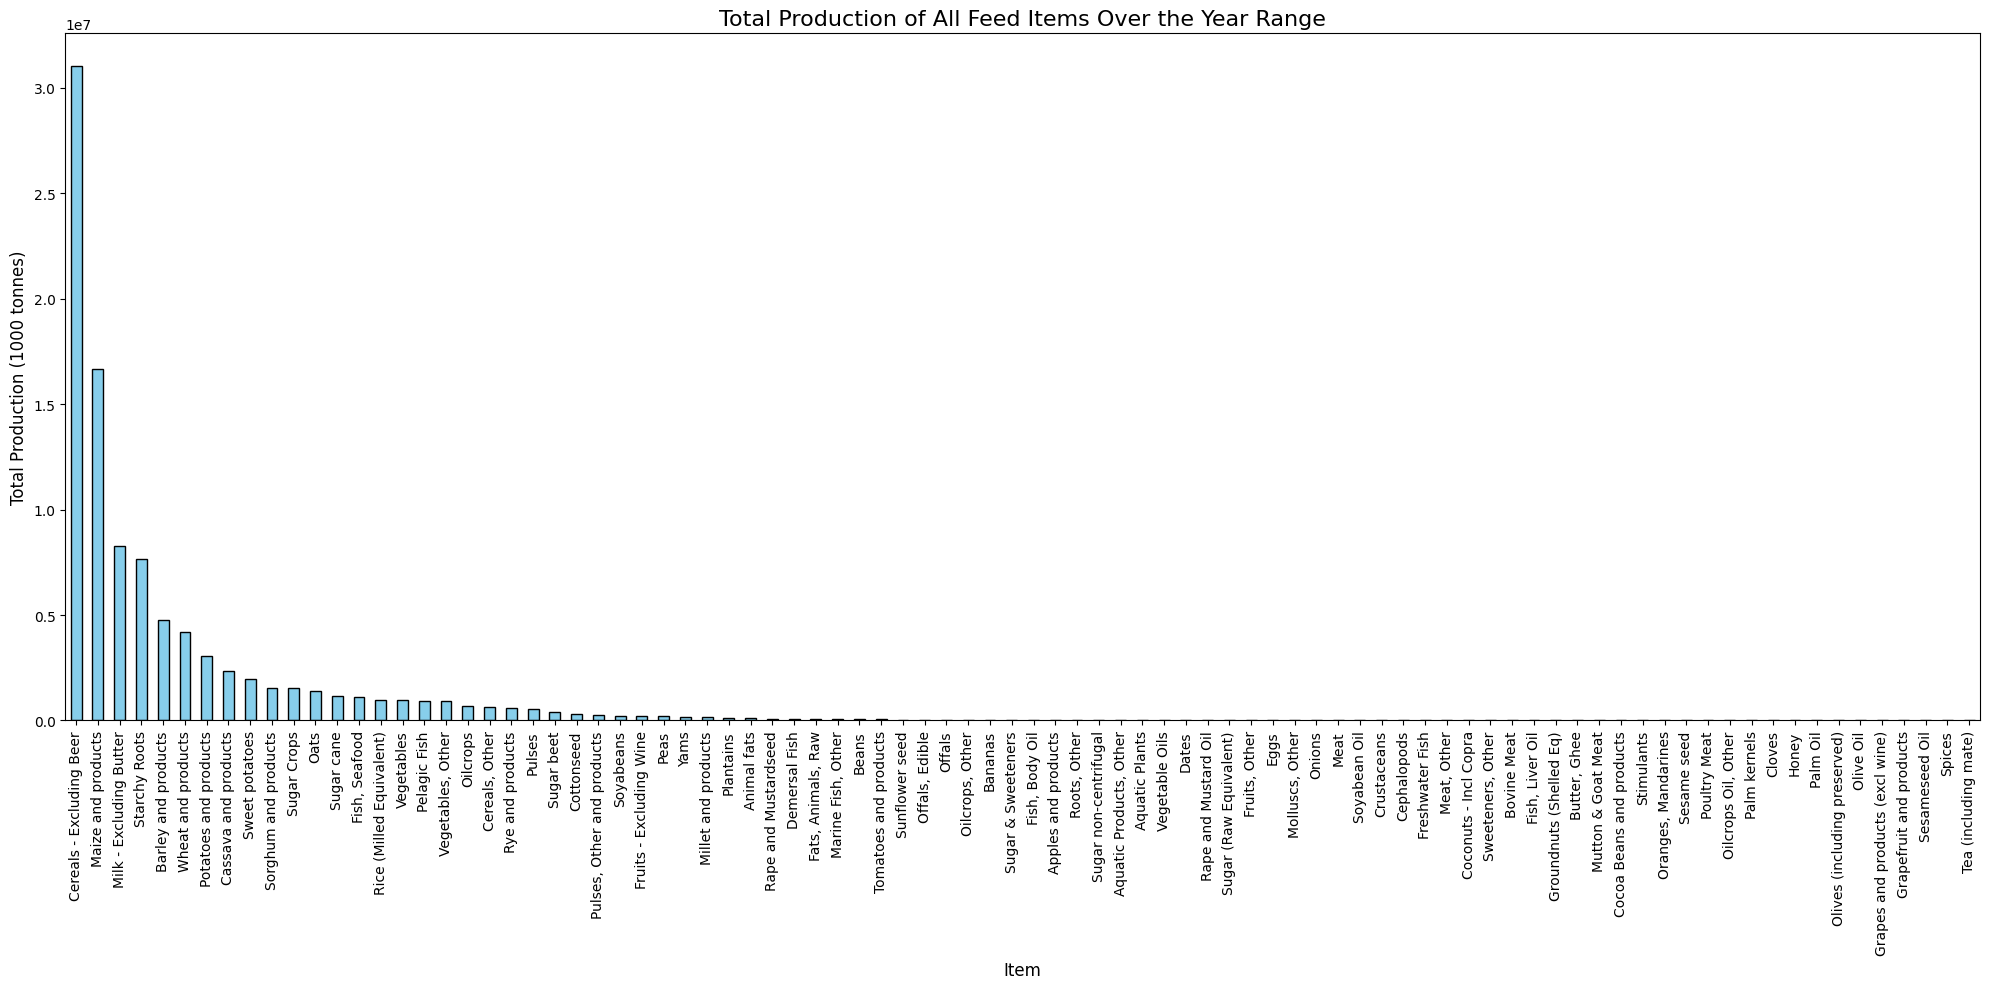

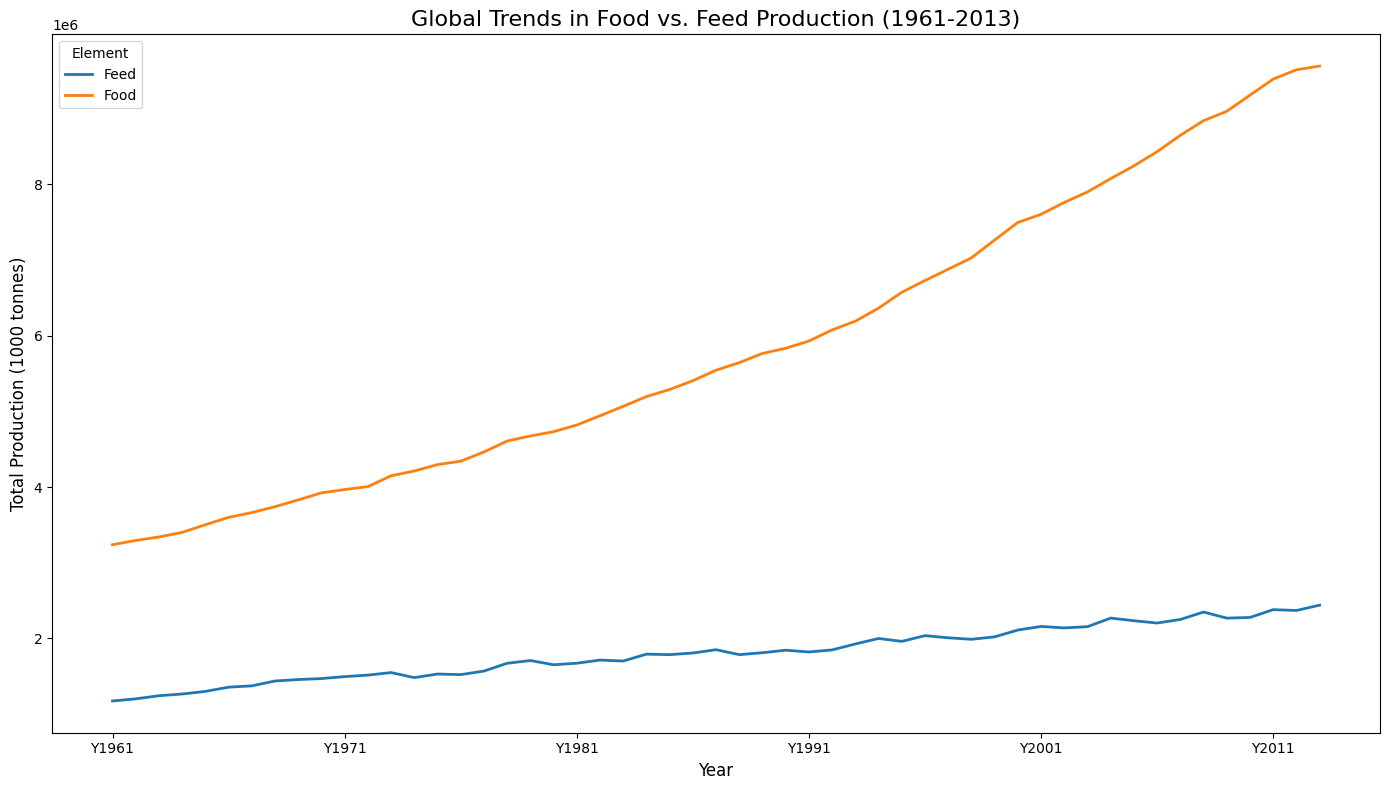

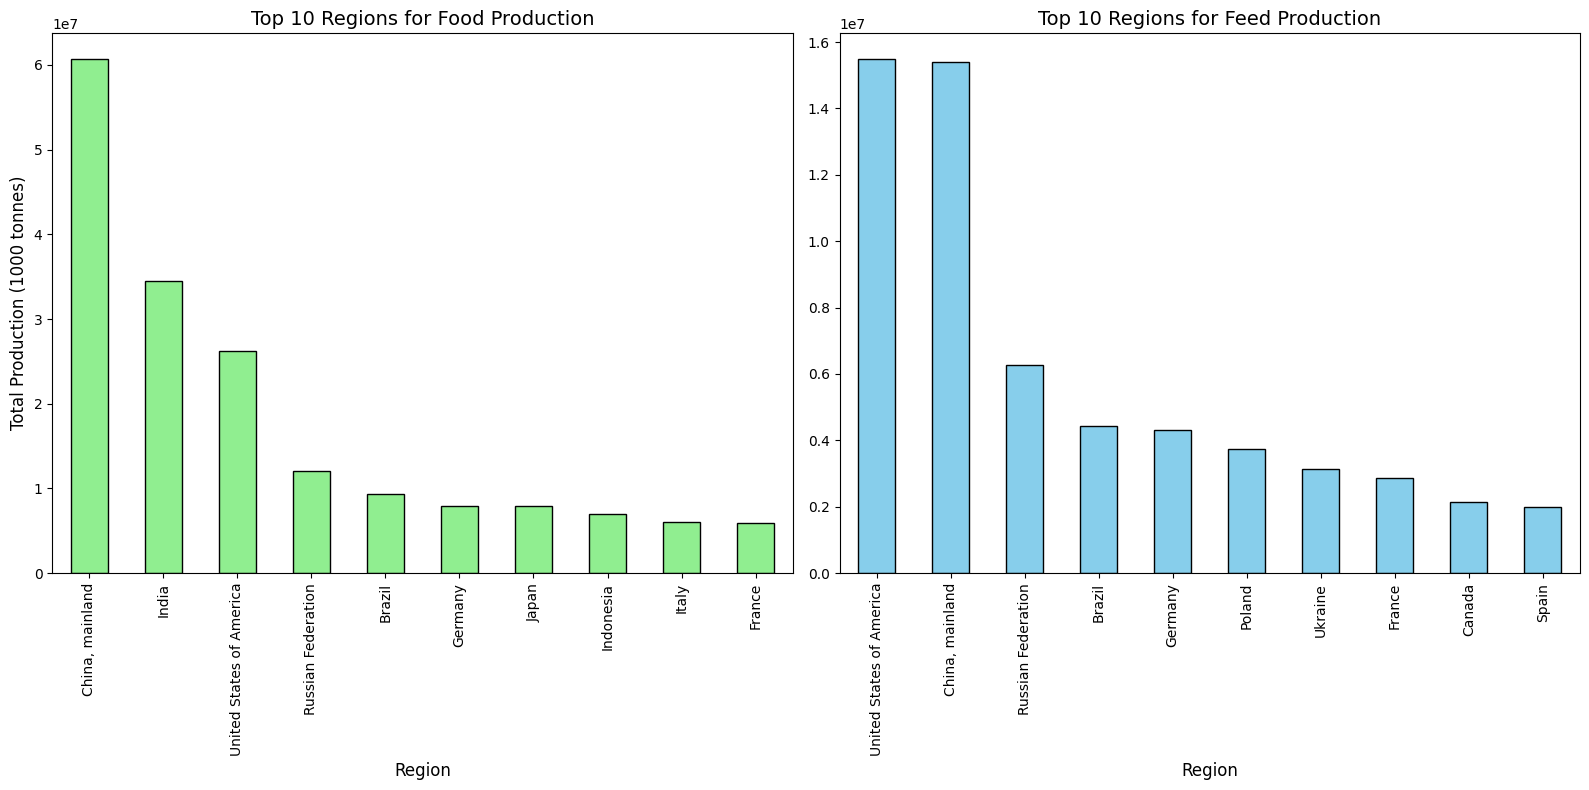

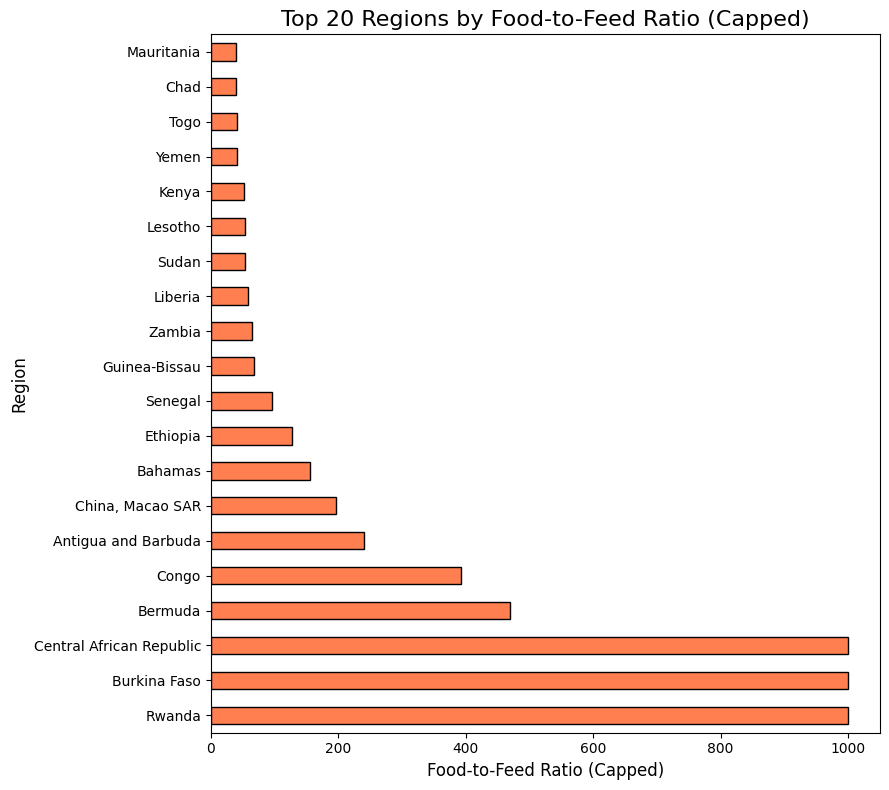

In [38]:
# Correlation heatmap for years
plt.figure(figsize=(12, 9))
sns.heatmap(fao.loc[:, 'Y1961':'Y2013'].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Yearly Production Data", fontsize=16)
plt.show()

# Example: Scatter plot on a map for total production in 2013
geo_data = fao.groupby(['latitude', 'longitude'])['Y2013'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.scatterplot(data=geo_data, x='longitude', y='latitude', size='Y2013', hue='Y2013', palette='viridis')
plt.title("Geospatial Distribution of Production in 2013", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.show()


# Plot the total production for all food over the year range

# Filter data for 'Food' element
food_data = fao[fao['Element'] == 'Food']

# Sum production values across all years for each item
item_production = food_data.groupby('Item')[year_columns].sum()

# Calculate total production across all years
item_production['Total_Production'] = item_production.sum(axis=1)

# Sort items by total production
item_production_sorted = item_production.sort_values('Total_Production', ascending=False)

plt.figure(figsize=(20, 10))
item_production_sorted['Total_Production'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Production of All Food Items Over the Year Range', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Total Production (1000 tonnes)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Distribution of Items 
# Plot the total production for all feed over the year range

feed_data = fao[fao['Element'] == 'Feed']
item_production = feed_data.groupby('Item')[year_columns].sum()

# Calculate total production across all years
item_production['Total_Production'] = item_production.sum(axis=1)

# Sort items by total production
item_production_sorted = item_production.sort_values('Total_Production', ascending=False)

plt.figure(figsize=(20, 10))
item_production_sorted['Total_Production'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Production of All Feed Items Over the Year Range', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Total Production (1000 tonnes)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Comparison of Food vs. Feed Production Over Time
# Purpose: Visualize how food and feed production have evolved over the years globally.

# Aggregate yearly production by element (Food vs Feed)
food_feed_data = fao.groupby('Element')[year_columns].sum().T

# Plot the trends
food_feed_data.plot(figsize=(14, 8), linewidth=2)
plt.title('Global Trends in Food vs. Feed Production (1961-2013)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Production (1000 tonnes)', fontsize=12)
plt.legend(title='Element', loc='upper left')
plt.tight_layout()
plt.show()


# Contribution of Top Regions to Food vs. Feed
# Purpose: Identify which regions contribute the most to food and feed production.

# Aggregate total production by region and element
region_element_data = fao.groupby(['Area', 'Element'])[year_columns].sum()
region_element_data['Total_Production'] = region_element_data.sum(axis=1)

# Filter for top 10 regions for Food and Feed
top_food_regions = region_element_data.xs('Food', level='Element').nlargest(10, 'Total_Production')
top_feed_regions = region_element_data.xs('Feed', level='Element').nlargest(10, 'Total_Production')

# Plot
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
top_food_regions['Total_Production'].plot(kind='bar', color='lightgreen', edgecolor='black', ax=ax[0])
ax[0].set_title('Top 10 Regions for Food Production', fontsize=14)
ax[0].set_xlabel('Region', fontsize=12)
ax[0].set_ylabel('Total Production (1000 tonnes)', fontsize=12)
ax[0].tick_params(axis='x', rotation=90)

top_feed_regions['Total_Production'].plot(kind='bar', color='skyblue', edgecolor='black', ax=ax[1])
ax[1].set_title('Top 10 Regions for Feed Production', fontsize=14)
ax[1].set_xlabel('Region', fontsize=12)
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



# Food-to-Feed Ratio by Region
# Purpose: Highlight the balance between food and feed production for each region. ####################

# Calculate the food-to-feed ratio for each region
region_ratio = (
    region_element_data.reset_index()
    .pivot(index='Area', columns='Element', values='Total_Production')
    .fillna(0)  # Replace NaNs with 0
    .assign(Food_to_Feed=lambda x: np.where(x['Feed'] > 0, x['Food'] / x['Feed'], np.nan))  # Avoid division by zero
    .dropna(subset=['Food_to_Feed'])  # Exclude rows where Feed is zero
    .sort_values('Food_to_Feed', ascending=False)
)

# Cap extreme ratios for better visualization
max_ratio = 1000  # Define a maximum cap for ratios
region_ratio['Food_to_Feed'] = region_ratio['Food_to_Feed'].clip(upper=max_ratio)

# Plot the top 20 regions by food-to-feed ratio
region_ratio['Food_to_Feed'].sort_values(ascending=False).head(20).plot(
    kind='barh', figsize=(9, 8), color='coral', edgecolor='black'
)
plt.title('Top 20 Regions by Food-to-Feed Ratio (Capped)', fontsize=16)
plt.xlabel('Food-to-Feed Ratio (Capped)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()

### **Analysis of the Visualizations**
#### **1. Correlation Heatmap of Yearly Production Data**
- Strong positive correlations between adjacent years (e.g., Y1961 and Y1962) indicate consistent trends in production data.
- The lower correlation observed in more recent years suggests increased variability or diversification in production practices.
- The heatmap reveals a gradual decrease in correlation over longer time gaps, which is expected as agricultural practices, global demand, and climate changes impact production.
#### **2. Geospatial Distribution of Production in 2013**
- Production is concentrated in specific regions, with notable clusters in Asia, Europe, and North America.
- The largest production points (highlighted in yellow) likely correspond to high-producing countries such as the United States, China, or India.
- Sparse production is observed in regions such as Africa and South America, indicating potential disparities in agricultural output.
#### **3. Total Production of All Food Items**
- The top contributors to global food production are "Milk - Excluding Butter," "Cereals - Excluding Beer," and "Vegetables."
- The distribution is highly skewed, with a few key items dominating total production, while many others contribute minimally.
- This indicates a reliance on staple food items to meet global demand.
#### **4. Total Production of All Feed Items**
- Feed production is led by "Cereals - Excluding Beer" and "Maize and Products."
- The dominance of grains in feed production highlights their role as a primary energy source for livestock.
- Similar to food items, feed production is also highly concentrated in a few categories.
#### **5. Global Trends in Food vs. Feed Production**
- Food production has grown steadily over the years, far outpacing feed production.
- This growth aligns with increasing global population and demand for food.
- The slower growth in feed production may reflect improvements in livestock efficiency or alternative feed sources.
#### **6. Top 10 Regions for Food and Feed Production**
- Food:
China and India dominate food production, reflecting their large populations and extensive agricultural sectors.
Other top contributors include the United States, Russia, and Brazil.
- Feed:
The United States is the largest feed producer, followed by China and Russia.
These regions likely have significant livestock industries driving feed demand.
#### **7. Top 20 Regions by Food-to-Feed Ratio (Capped)**
- Regions such as Rwanda and Burkina Faso have high food-to-feed ratios, reflecting their focus on food production over feed production.
- Developed regions with large livestock industries typically have lower ratios due to higher feed production requirements.
- The capping of ratios highlights a more balanced comparison and reduces the impact of extreme outliers.


### **Key Observations and Recommendations**
#### **Global Food Dominance:**
The dominance of a few items and regions in global production indicates potential vulnerabilities in the food supply chain.
Diversification of food sources and regions could improve resilience.

#### **Feed Production Efficiency:**
Feed production, while smaller in scale, is critical for supporting livestock industries.
Optimizing feed efficiency and exploring alternative sources could benefit high-demand regions.

#### **Geographical Disparities:**
Geospatial analysis highlights disparities in production across regions.
Investments in underperforming regions could help bridge the gap and ensure global food security.

#### **Temporal Trends:**
The steady growth in food production aligns with global population growth.
Monitoring recent variability in production trends could help identify potential disruptions.

#### **Food-to-Feed Ratio:**
Regions with high ratios reflect a focus on food security over livestock production.
Balancing these priorities will be crucial as global food and protein demands rise.



### **3.7. Key Insights**
 - Summarize the key findings from your exploration phase:
 - Patterns
 - Anomalies
 - Questions that arise for further analysis

### **1. Patterns Observed**
#### **Global Trends:**

- Food production has steadily increased from 1961 to 2013, reflecting advancements in agriculture and the need to meet growing population demands.
- Feed production, while also increasing, has grown at a slower rate compared to food production, highlighting a global focus on human consumption over livestock feed.

#### **Dominance of Certain Items:**

- A few items dominate global production:
    - Food: "Milk - Excluding Butter," "Cereals - Excluding Beer," and "Vegetables" lead production.
    - Feed: "Cereals - Excluding Beer" and "Maize and Products" are the primary contributors.
- The reliance on a few staples for food and feed production could pose risks to food security in the face of climate change or market disruptions.

#### **Regional Contributions:**

- Top Producers:
    - Food: China and India are the largest contributors, driven by their large populations and agricultural capacity.
    - Feed: The United States dominates feed production, likely due to its extensive livestock industries.
- Food-to-Feed Ratios:
    - Regions like Rwanda and Burkina Faso have exceptionally high food-to-feed ratios, suggesting a focus on food security over livestock production.
    - Developed countries with larger livestock industries tend to have lower food-to-feed ratios.

#### **Temporal Correlations:**

- Strong correlations between adjacent years suggest consistent trends in production.
- Over longer time periods, correlations weaken slightly, reflecting evolving agricultural practices and external influences like climate or market demands.

### **2. Anomalies Detected**
#### **Outliers:**

- Both Z-score and IQR methods identified significant outliers across the dataset:
    - Z-score: A small proportion of extreme values (~0.44%–0.56% per year).
    - IQR: A much larger number of outliers, reflecting the skewed nature of production data.
- Outliers were particularly prevalent in later years, where variability in production increased.

#### **Geospatial Disparities:**

- Production is heavily concentrated in certain regions (e.g., Asia, Europe, North America), while others (e.g., Africa) show significantly lower production levels.
- This highlights disparities in agricultural capacity and access to resources.

#### **Food-to-Feed Ratios:**

- Certain regions exhibit extreme food-to-feed ratios, which may be valid reflections of local agricultural priorities or indicative of data issues.

### **3. Questions for Further Analysis**

#### **Outlier Investigation:**

- What are the causes of extreme outliers in production data?
- Are they the result of data errors, one-off events (e.g., natural disasters), or structural issues in agricultural systems?

#### **Geographical Disparities:**

- How can underperforming regions (e.g., in Africa) increase agricultural output to bridge the production gap?
- What role do policies, technology, and climate play in these disparities?

#### **Food vs. Feed Balance:**

- What strategies can regions with low food-to-feed ratios adopt to improve food security without compromising livestock production?
- How does the balance of food and feed production impact global sustainability?

#### **Dominance of Key Items:**

- What risks do we face due to over-reliance on a few key items (e.g., cereals, milk)?
- How can we diversify food and feed sources to improve global food security?

#### **Impact of Climate and Policy:**

- How have climate change and agricultural policies influenced the observed trends and anomalies?
- What are the projected impacts of these factors on future food and feed production?

# **PART 4: Predictive Modelling**

**Goal**: In this step, you should carry on classification based on what you want to predict from the data. You should apply at least three classification algorithms that we have talked about in class and compare their performance. You should clearly state which algorithms that you try and why. You should properly setup your training environment, ie. setup your training, validation and test sets. You should also comment on the parameter selection procedures and analyse the performance based on the parameters.

**Answer**: The goal is to predict the amount of food item produced in year 2013. Algorithms for application:
1. Linear Regression
    Baseline Model. Fast to train and evaluate. Comparing its performance with more advanced models helps to inderstand whether the problem required something more complex.
    **Why it might perform well**:
    If the production trends from previous years have a linear relationship with 2013 production, Linear Regression can perform well. 
    ***Choosing features for prediction:***
    Past production values are crucial for predicting production in upcoming years. Use recent years to focus on most relevant trends.
    Latitude and longtitude can capture climate and regional factors affecting production. 
2. Support Vector Regressor
    Unlike the linear regression model, works well for non-linear relationships using different kernels.
    **Why it might perform well**:
    Handles non-linear relationships better than Linear Regression.
3. Random Forest
    Captures complex non-linear relationships well. Would ouperform all previously used models, if the perfomance is not sufficient.
    **Why it might perform well**
    Handles non-linear relationship and complex feature interactions effectively. Handles categorical variables well. Excellent choice for the dataset, it adapts to complex trends in production data.


In [39]:
# 1. Defining the problem and type of model: 
# - Predicting the amount of food item produced in 1000 tones in year 2013
#   - Linear Regression
#   - Support Vector Regressor
#   - Random Forest Regressor

# 2. Split the Data
# define features and target
X = fao[['Area Code', 'Item Code',
       'Element Code', 'latitude', 'longitude', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012']]
y = fao['Y2013']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
# 3. Train the Model
# - Fit the model to the training data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
# 4. Make prediction
y_pred_linear = linear_model.predict(X_test)

In [40]:
# Repeat for Support Vector Regressor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr_model = SVR(kernel='rbf', C= 1.0, epsilon = 0.1)
# train the model
svr_model.fit(X_train_scaled, y_train)
y_pred_SVR = svr_model.predict(X_test_scaled)

In [41]:
# Repeat for Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=12)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [42]:
# summary table of performance metrics
def evaluate_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

linear_metrics = evaluate_regression(y_test, y_pred_linear)
svr_metrics = evaluate_regression(y_test, y_pred_SVR)
forest_metrics = evaluate_regression(y_test, y_pred_rf)

metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Regressor', 'Random Forest'],
    'MAE': [linear_metrics[0], svr_metrics[0], forest_metrics[0]],
    'MSE': [linear_metrics[1], svr_metrics[1], forest_metrics[1]],
    'R² Score': [linear_metrics[2], svr_metrics[2], forest_metrics[2]]
})
print(metrics_df)

                      Model         MAE           MSE  R² Score
0         Linear Regression   43.882305  4.785313e+04  0.997924
1  Support Vector Regressor  497.549189  2.313241e+07 -0.003351
2             Random Forest   40.055080  2.949090e+05  0.987209


**Goal 2:** Classifying countries as "High-Producing" or "Low-Producing" to identify and predict top producers in the upcoming years.

**Answer**  Consider following models:
1. Logistic regression. Used as a baseline model. Might work the best, as it is expected that the values would have linear relationship.
2. Random Forest. More complex model to capture more complex relationships
3. SVM. Effective for non-linear relationaship.

In [43]:
X = fao[['Area Code','Item Code', 'Element Code', 'latitude', 'longitude', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012']]
y = fao['Region_Type']
# encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.4, random_state=12)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=12)


In [44]:
# train logistic regression
logistic_model = LogisticRegression(max_iter=1000, random_state=12)
logistic_model.fit(X_train, y_train)
# predict on validation set
y_val_pred_logistic = logistic_model.predict(X_val)

print("Logistic Regression Performance:")
print(classification_report(y_val, y_val_pred_logistic))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      2245
           1       0.70      0.69      0.69      2050

    accuracy                           0.71      4295
   macro avg       0.71      0.71      0.71      4295
weighted avg       0.71      0.71      0.71      4295



In [45]:
# SVM with RBF
svc_model = SVC(kernel='rbf', random_state=12)
svc_model.fit(X_train, y_train)
y_val_pred_svc = svc_model.predict(X_val)

print("SVM Performance:")
print(classification_report(y_val, y_val_pred_svc))

SVM Performance:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75      2245
           1       0.73      0.69      0.71      2050

    accuracy                           0.73      4295
   macro avg       0.73      0.73      0.73      4295
weighted avg       0.73      0.73      0.73      4295



In [46]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=12)

rf_model.fit(X_train, y_train)
y_val_pred_rf = rf_model.predict(X_val)

print("Random Forest Performance:")
print(classification_report(y_val, y_val_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2245
           1       1.00      0.99      0.99      2050

    accuracy                           0.99      4295
   macro avg       0.99      0.99      0.99      4295
weighted avg       0.99      0.99      0.99      4295



### Parameter tuning for classification models:
Notes: 
1. Random Forest seemed to perform the best, after the SVM classification model. Attempting to increase performance by tuning the parameters of both.
2. Using smaller subset for tuning, since the dataset is too big for faster iteration.

In [47]:
# sample 10% of the training dataset for parameter tuning
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=12)


In [48]:
# parameter tuning for logistic regression
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_sample, y_sample)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [49]:
# parameter tuning for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1],
}
grid_search = GridSearchCV(SVC(random_state=12), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_sample, y_sample)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [50]:
# parameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=12), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_sample, y_sample)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# **PART 5: Model Evaluation and Visualization**

In this last step of the data science cycle, you should evaluate your classification model based on various different evaluation metrics. In addition, you should provide visualizations on the performance of your algorithm (such as confusion matrices, ROC curves, PR curves, etc.).


In [51]:
# fit the models with the new parameters after tuning
# {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'
best_logistic_model = LogisticRegression(
    penalty='l1',
    C=100,
    solver='liblinear',
    max_iter=10000,
    random_state=12
)
best_logistic_model.fit(X_train, y_train)
y_val_pred_logistic = best_logistic_model.predict(X_val)

# SVM with best parameters
# {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
best_svc_model = SVC(
    C=10,                  
    kernel='rbf',        
    gamma=1,             
    probability=True,     
    random_state=12
)
best_svc_model.fit(X_train, y_train)

# Validate predictions
y_val_pred_svc = best_svc_model.predict(X_val)

# Random Forest with best parameters
# {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
best_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth= None,
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=12
)
best_rf_model.fit(X_train, y_train)

y_val_pred_rf = best_rf_model.predict(X_val)

### Evaluation Metrics Used
1. Accuracy
2. Precision
3. Recall
4. F1-Score
5. AUC-ROC Score

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      2245
           1       0.69      0.69      0.69      2050

    accuracy                           0.71      4295
   macro avg       0.71      0.71      0.71      4295
weighted avg       0.71      0.71      0.71      4295



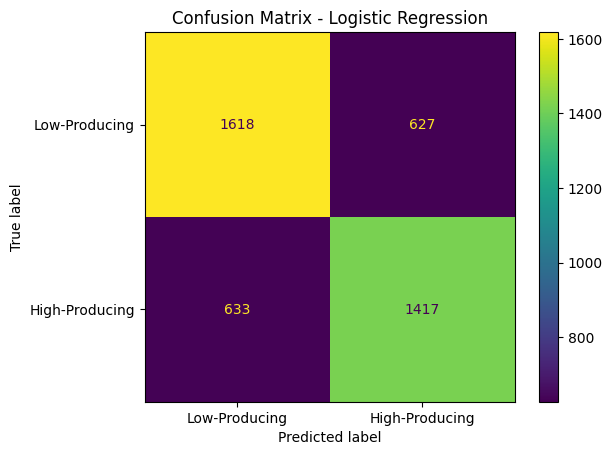

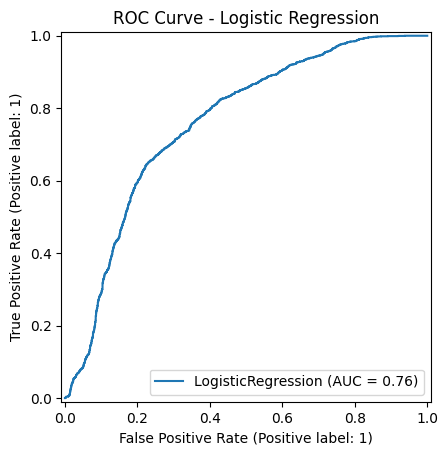

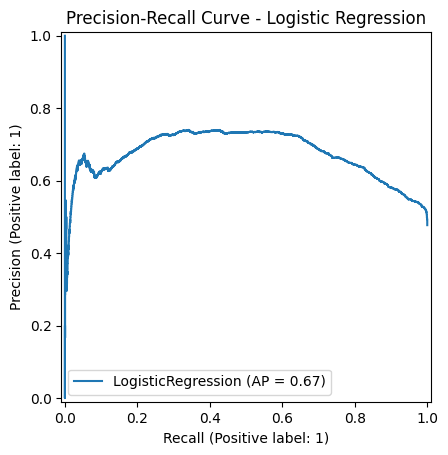

SVM Performance:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      2245
           1       0.98      0.92      0.95      2050

    accuracy                           0.95      4295
   macro avg       0.95      0.95      0.95      4295
weighted avg       0.95      0.95      0.95      4295



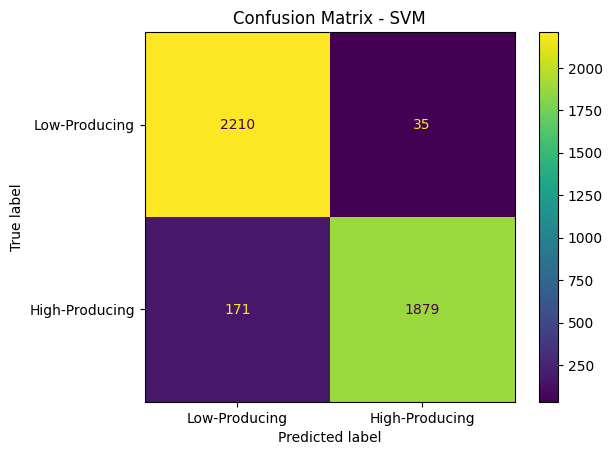

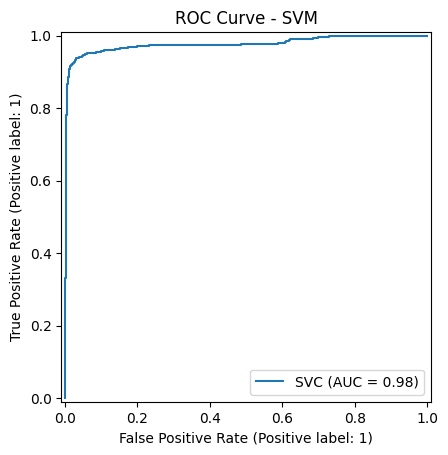

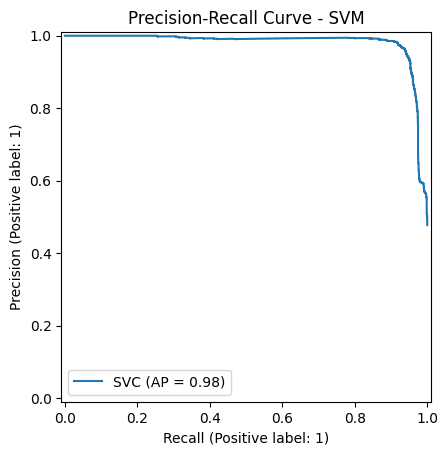

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2245
           1       1.00      0.99      0.99      2050

    accuracy                           0.99      4295
   macro avg       0.99      0.99      0.99      4295
weighted avg       0.99      0.99      0.99      4295



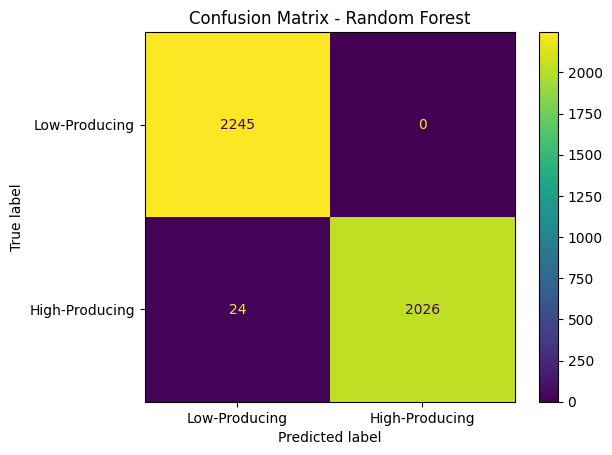

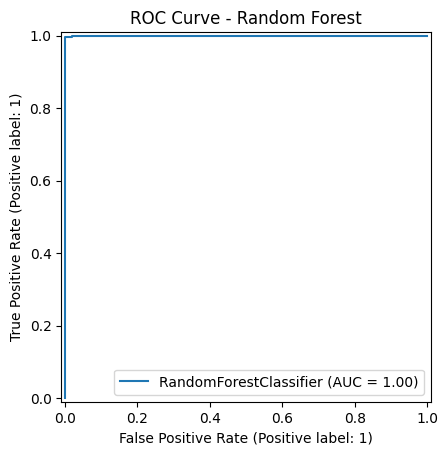

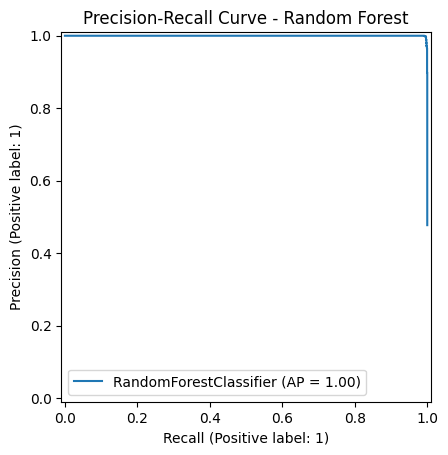

In [52]:
# Logistic Regression Evaluation
print("Logistic Regression Performance:")
print(classification_report(y_val, y_val_pred_logistic))
ConfusionMatrixDisplay.from_estimator(best_logistic_model, X_val, y_val, display_labels=['Low-Producing', 'High-Producing'])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
if len(set(y_val)) == 2: 
    RocCurveDisplay.from_estimator(best_logistic_model, X_val, y_val)
    plt.title("ROC Curve - Logistic Regression")
    plt.show()
    PrecisionRecallDisplay.from_estimator(best_logistic_model, X_val, y_val)
    plt.title("Precision-Recall Curve - Logistic Regression")
    plt.show()

# SVM Evaluation
print("SVM Performance:")
print(classification_report(y_val, y_val_pred_svc))
ConfusionMatrixDisplay.from_estimator(best_svc_model, X_val, y_val, display_labels=['Low-Producing', 'High-Producing'])
plt.title("Confusion Matrix - SVM")
plt.show()
if len(set(y_val)) == 2:  
    RocCurveDisplay.from_estimator(best_svc_model, X_val, y_val)
    plt.title("ROC Curve - SVM")
    plt.show()
    PrecisionRecallDisplay.from_estimator(best_svc_model, X_val, y_val)
    plt.title("Precision-Recall Curve - SVM")
    plt.show()

# Random Forest Evaluation
print("Random Forest Performance:")
print(classification_report(y_val, y_val_pred_rf))
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_val, y_val, display_labels=['Low-Producing', 'High-Producing'])
plt.title("Confusion Matrix - Random Forest")
plt.show()
if len(set(y_val)) == 2:  
    RocCurveDisplay.from_estimator(best_rf_model, X_val, y_val)
    plt.title("ROC Curve - Random Forest")
    plt.show()
    PrecisionRecallDisplay.from_estimator(best_rf_model, X_val, y_val)
    plt.title("Precision-Recall Curve - Random Forest")
    plt.show()


### Analysis and Observation of the performance of the Classification Models
#### Random Forest:
##### The model showed exceptional performance, with no false positives and minimal false negatives. It correctly identified nearly all high-producing and low-producing regions.
#### Support Vector Machine (SVM)
##### After the parameter tuning the model started performing significatly better as expected, since the SVM models are usually sensitive to the parameter tuning. SVM struggled slightly more with false negatives (168 cases) and false positives (35 cases) compared to Random Forest. However, it remained a strong performer overall.
#### Logistic Regression. 
##### Logistic Regression underperformed compared to the other models. Logistic Regression misclassified a significant number of cases, as evidenced by 632 false positives and 638 false negatives. This suggests that the model struggled to distinguish between high-producing and low-producing regions.

### Conclusion:
#### Best Model: The Random Forest model outperformed both SVM and Logistic Regression, achieving the highest accuracy, precision, recall, and F1-score. It is the most reliable model for classifying regions as high-producing or low-producing.